In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline


In [2]:
x_1000=np.load("data_x_1000.npy")
y_1000=np.load("data_y_1000.npy")
x_1000.shape

(1000, 64, 64, 3)

In [3]:
index=800
x_train_1000,x_test_1000,y_train_1000,y_test_1000=x_1000[:index],x_1000[index:],y_1000[:index],y_1000[index:]
x_train_1000.shape

(800, 64, 64, 3)

In [4]:
x_train_flatten_1000=x_train_1000.reshape(x_train_1000.shape[0],-1).T
x_test_flatten_1000=x_test_1000.reshape(x_test_1000.shape[0],-1).T

x_test_flatten_1000.shape,x_train_flatten_1000.shape

((12288, 200), (12288, 800))

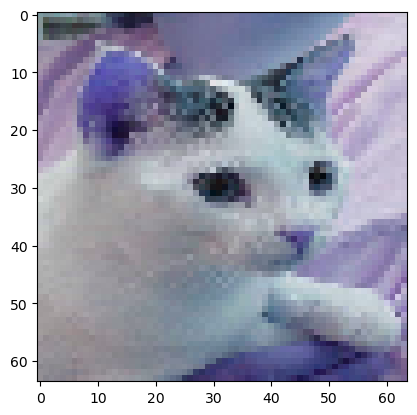

In [5]:
plt.imshow(x_test_1000[109])

### define activation functions

In [6]:
def sigmoid(z):
    a=1/(1+np.exp(-z))
    cache=z
    return a,cache

In [7]:
def relu(z):
    a=np.maximum(z,0)
    cache=z
    assert(a.shape == z.shape)
    return a,cache
    

In [8]:
def relu_backward(dA, cache):
    
    Z = cache
    dZ = np.array(dA, copy=True)
    
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

def sigmoid_backward(dA, cache):
    Z = cache
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    assert (dZ.shape == Z.shape)
    
    return dZ

## create our neural network

In [201]:
n_x=x_train_flatten_1000.shape[0]
n_h=7
n_y=y_train_1000.shape[0]
layer_dims=[n_x,n_h,n_y]
layer_dims

[12288, 7, 800]

In [168]:
def initialize_parameters(layer_dims):
    np.random.seed(30)
    parameters = {}
    L = len(layer_dims) 
    for l in range(1, L):
        parameters["W" + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
        parameters["b" + str(l)] = np.zeros((layer_dims[l], 1))   
    return parameters

In [169]:
def linear_activation_forward(A_prev, W, b, activation):
    Z=np.dot(W,A_prev)+b
    linear_cache=(A_prev,W,b)
    
    if activation=="sigmoid":
        A,activation_cache=sigmoid(Z)
    
    if activation=="relu":
        A,activation_cache=relu(Z)
        
    cache=(linear_cache,activation_cache)
    
    return A,cache
        

In [170]:
def L_model_forward(X,parameters):
    L=len(parameters)//2
    A=X
    caches=[]
    for l in range(1,L):
        A_pre=A
        A,cache=linear_activation_forward(A_pre,parameters["W"+str(l)],parameters["b"+str(l)],activation="relu")
        caches.append(cache)

    A,cache=linear_activation_forward(A,parameters["W"+str(L)],parameters["b"+str(L)],activation="sigmoid")
    caches.append(cache)
    return A,caches

In [171]:
def compute_cost(A,Y):
    cost=np.mean(-(Y*np.log(A)+(1-Y)*np.log(1-A)))
    cost=np.squeeze(cost)
    return cost

In [172]:
def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache
    if activation=="sigmoid":
        dz=sigmoid_backward(dA,activation_cache)
       
    if activation=="relu":
        dz=relu_backward(dA,activation_cache)

    A_prev, W, b = linear_cache
    m=A_prev.shape[1]
    dW = (1/m)*np.dot(dz,A_prev.T)
    db = (1/m)*np.sum(dz,keepdims=True,axis=1)
    dA_prev = np.dot(W.T,dz)
    return dA_prev, dW, db


In [173]:
def L_model_backward(AL, Y, caches):

    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)
    

    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))

    current_cache = caches[L-1]
    dA_prev_temp, dW_temp, db_temp = linear_activation_backward(dAL, current_cache, activation = "sigmoid")
    grads["dA" + str(L-1)] = dA_prev_temp
    grads["dW" + str(L)] = dW_temp
    grads["db" + str(L)] =db_temp
    for l in reversed(range(L-1)):
        
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, activation = "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l+1)] = dW_temp
        grads["db" + str(l+1)] =db_temp
    return grads

In [174]:
def update_parameters(params, grads, learning_rate):

    parameters = params.copy()
    L = len(parameters) //2

    for l in range(L):
        parameters["W" + str(l+1)] =parameters["W" + str(l+1)]-learning_rate*grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)]-learning_rate*grads["db" + str(l+1)]
        
    return parameters

In [178]:
def L_layer_model(X, Y, layers_dims, learning_rate, num_iterations, print_cost=False):


    np.random.seed(10)
    costs = []                        

    parameters= initialize_parameters(layers_dims)


    for i in range(0, num_iterations):

        AL,caches=L_model_forward(X, parameters)
        

        
        cost=compute_cost(AL, Y)
        

        
        grads=L_model_backward(AL, Y, caches)
        
  
        parameters=update_parameters(parameters, grads, learning_rate)
        
  
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)
    
    return parameters, costs

In [181]:
parameters, costs = L_layer_model(x_train_flatten_1000, y_train_1000, layers_dims, num_iterations = 2600, print_cost = True)

Cost after iteration 0: 0.6930805219041047
Cost after iteration 100: 0.688533782848159
Cost after iteration 200: 0.6621890765496835
Cost after iteration 300: 0.6400059902632305
Cost after iteration 400: 0.6149937956972026
Cost after iteration 500: 0.5911014170970088
Cost after iteration 600: 0.5737270125804318
Cost after iteration 700: 0.5543260864207589
Cost after iteration 800: 0.5255096767604607
Cost after iteration 900: 0.5156455793235374
Cost after iteration 1000: 0.4319724327781347
Cost after iteration 1100: 0.5307044788489952
Cost after iteration 1200: 0.4322729946244193
Cost after iteration 1300: 0.5863289791475033
Cost after iteration 1400: 0.5241509443269053
Cost after iteration 1500: 0.4286754439177418
Cost after iteration 1600: 0.4219121599748207
Cost after iteration 1700: 0.5165893645777554
Cost after iteration 1800: 0.7063632922230307
Cost after iteration 1900: 0.6011304981343664
Cost after iteration 2000: 0.26596673068918897
Cost after iteration 2100: 0.508665036934437
C

Accuracy: 0.635
Accuracy: 0.95


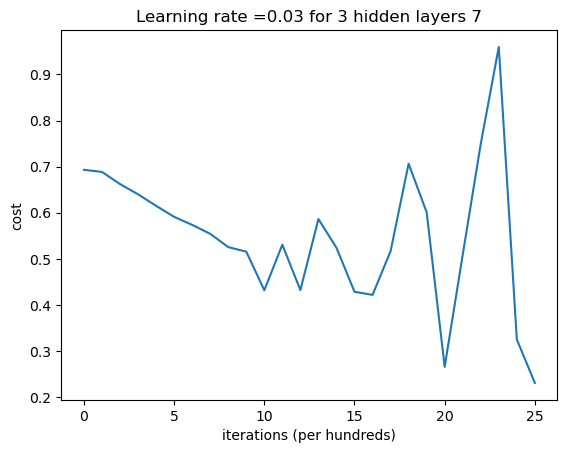

In [182]:
def plot_costs(costs, learning_rate=0.03):
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    p1,pred_test = predict(x_test_flatten_1000, y_test_1000, parameters)
    p2,pred_train=predict(x_train_flatten_1000, y_train_1000, parameters)
    plt.title("Learning rate =" + str(learning_rate)+" for 3 hidden layers 7")
    #plt.title("test accuracy= "+ str(pred_test)+ " train accuracy ="+ str(pred_train))
    plt.show()
plot_costs(costs)

Accuracy: 0.64
Accuracy: 0.9212499999999999


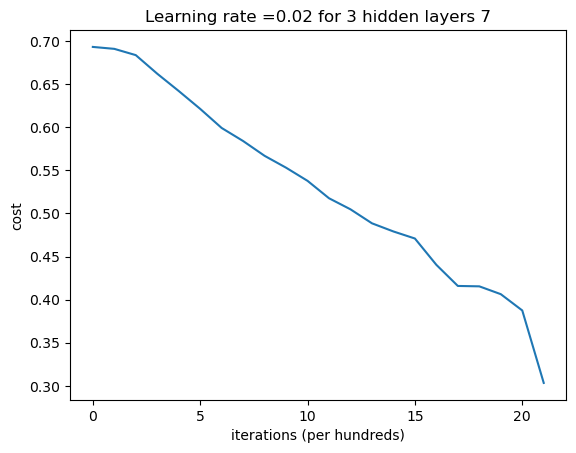

In [177]:
def plot_costs(costs, learning_rate=0.02):
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    p1,pred_test = predict(x_test_flatten_1000, y_test_1000, parameters)
    p2,pred_train=predict(x_train_flatten_1000, y_train_1000, parameters)
    plt.title("Learning rate =" + str(learning_rate)+" for 3 hidden layers 7")
    #plt.title("test accuracy= "+ str(pred_test)+ " train accuracy ="+ str(pred_train))
    plt.show()
plot_costs(costs)

Accuracy: 0.545
Accuracy: 0.7374999999999999


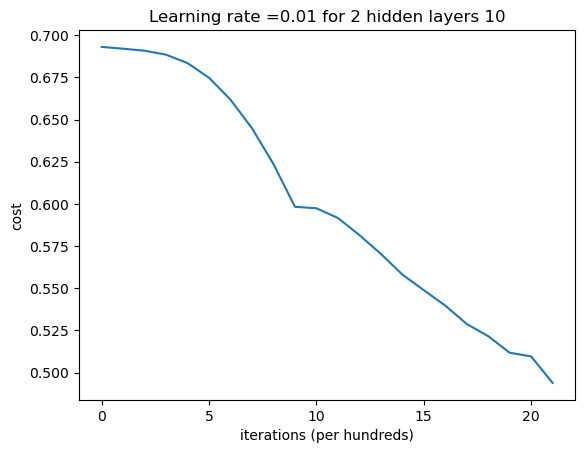

In [154]:
def plot_costs(costs, learning_rate=0.01):
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    p1,pred_test = predict(x_test_flatten_1000, y_test_1000, parameters)
    p2,pred_train=predict(x_train_flatten_1000, y_train_1000, parameters)
    plt.title("Learning rate =" + str(learning_rate)+" for 2 hidden layers 1`0")
    #plt.title("test accuracy= "+ str(pred_test)+ " train accuracy ="+ str(pred_train))
    plt.show()
plot_costs(costs)

Accuracy: 0.545
Accuracy: 0.7374999999999999


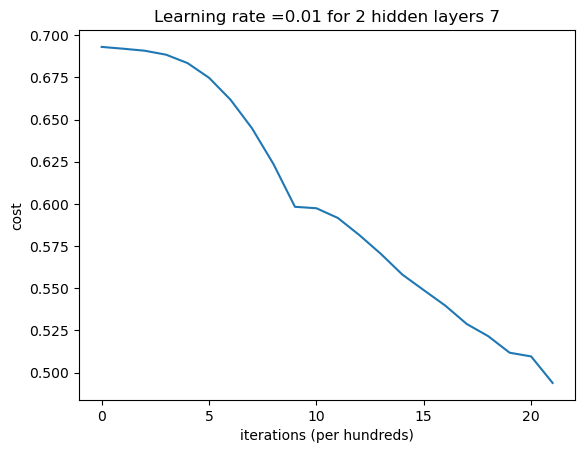

In [166]:
def plot_costs(costs, learning_rate=0.01):
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    p1,pred_test = predict(x_test_flatten_1000, y_test_1000, parameters)
    p2,pred_train=predict(x_train_flatten_1000, y_train_1000, parameters)
    plt.title("Learning rate =" + str(learning_rate)+" for 2 hidden layers 7")
    #plt.title‍("test accuracy= "+ str(pred_test)+ " train accuracy ="+ str(pred_train))
    plt.show()
plot_costs(costs)

Accuracy: 0.64
Accuracy: 0.9212499999999999


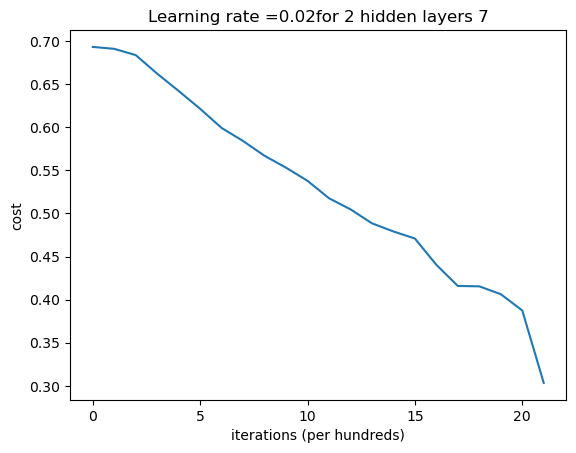

In [137]:
def plot_costs(costs, learning_rate=0.02):
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    p1,pred_test = predict(x_test_flatten_1000, y_test_1000, parameters)
    p2,pred_train=predict(x_train_flatten_1000, y_train_1000, parameters)
    plt.title("Learning rate =" + str(learning_rate)+"for 2 hidden layers 7")
    #plt.title("test accuracy= "+ str(pred_test)+ " train accuracy ="+ str(pred_train))
    plt.show()
plot_costs(costs)

Accuracy: 0.625
Accuracy: 0.9112499999999999


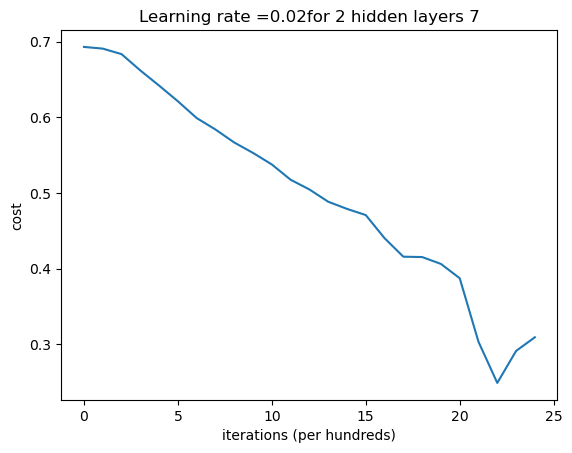

In [134]:
def plot_costs(costs, learning_rate=0.02):
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    p1,pred_test = predict(x_test_flatten_1000, y_test_1000, parameters)
    p2,pred_train=predict(x_train_flatten_1000, y_train_1000, parameters)
    plt.title("Learning rate =" + str(learning_rate)+"for 2 hidden layers 7")
    #plt.title("test accuracy= "+ str(pred_test)+ " train accuracy ="+ str(pred_train))
    plt.show()
plot_costs(costs)

Accuracy: 0.555
Accuracy: 0.7562499999999999


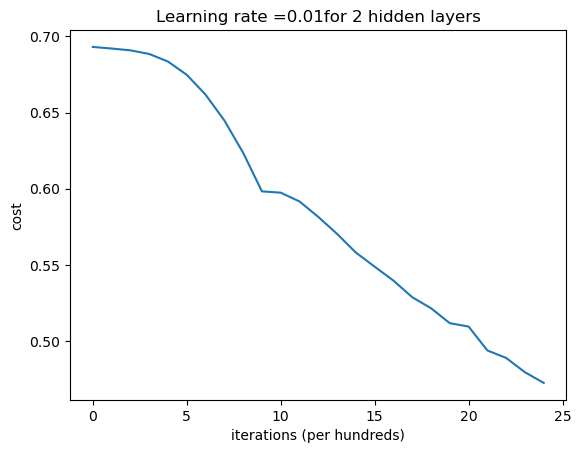

In [122]:
def plot_costs(costs, learning_rate=0.01):
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    p1,pred_test = predict(x_test_flatten_1000, y_test_1000, parameters)
    p2,pred_train=predict(x_train_flatten_1000, y_train_1000, parameters)
    plt.title("Learning rate =" + str(learning_rate)+"for 2 hidden layers")
    #plt.title("test accuracy= "+ str(pred_test)+ " train accuracy ="+ str(pred_train))
    plt.show()
plot_costs(costs)

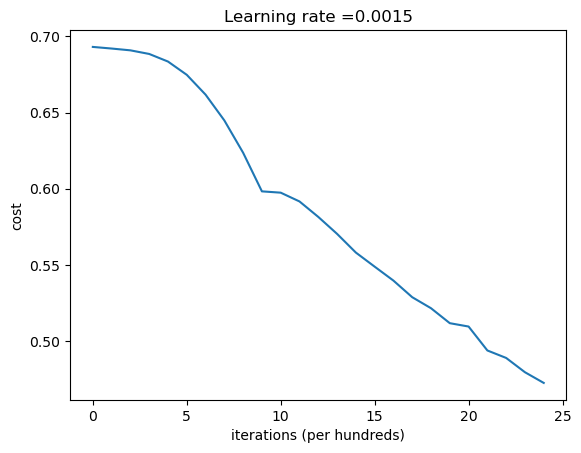

In [105]:
def plot_costs(costs, learning_rate=0.0015):
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
plot_costs(costs)

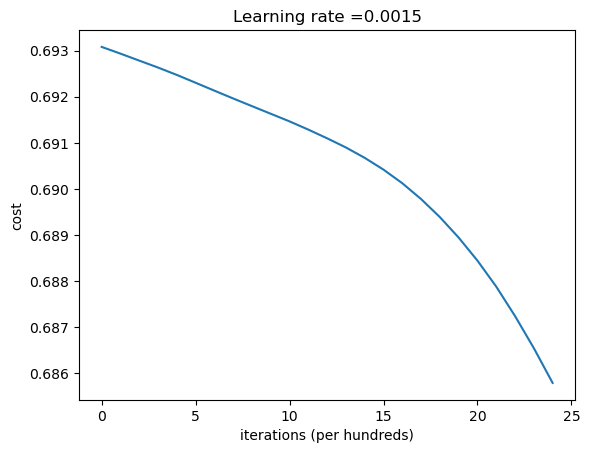

In [102]:
def plot_costs(costs, learning_rate=0.0015):
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
plot_costs(costs)

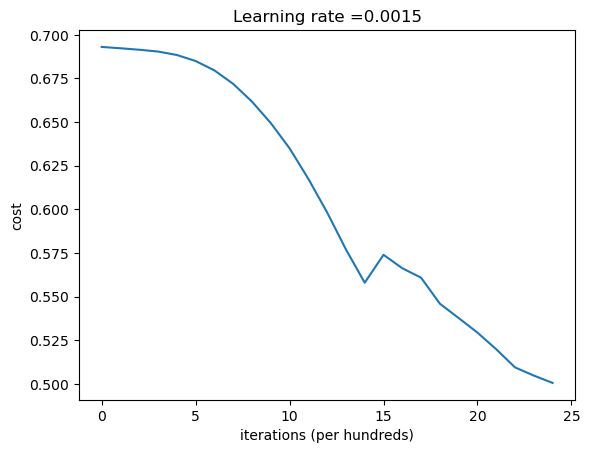

In [99]:
def plot_costs(costs, learning_rate=0.0015):
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
plot_costs(costs)

In [120]:
def predict(X, y, parameters):
    """
    This function is used to predict the results of a  L-layer neural network.
    
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    
    Returns:
    p -- predictions for the given dataset X
    """
    
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    
    # Forward propagation
    probas, caches = L_model_forward(X, parameters)

    
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    accuracy=np.sum((p == y)/m)
    print("Accuracy: "  + str(accuracy))
        
    return p,accuracy

In [106]:
pred_test = predict(x_test_flatten_1000, y_test_1000, parameters)

Accuracy: 0.555


In [107]:
predict(x_train_flatten_1000, y_train_1000, parameters)

Accuracy: 0.7562499999999999


array([[1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
        1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
        0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
        0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1.,
        1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
        1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
        1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
        1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0.,
        1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
        1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 

In [184]:
x_500=np.load("data_x_500.npy")
y_500=np.load("data_y_500.npy")
x_500.shape,y_500.shape

((500, 64, 64, 3), (500,))

In [185]:
index=400
x_train_500,x_test_500,y_train_500,y_test_500=x_500[:index],x_500[index:],y_500[:index],y_500[index:]
x_train_500.shape,y_train_500.shape

((400, 64, 64, 3), (400,))

In [186]:
x_train_flatten_500=x_train_500.reshape(x_train_500.shape[0],-1).T
x_test_flatten_500=x_test_500.reshape(x_test_500.shape[0],-1).T

x_test_flatten_500.shape,x_train_flatten_500.shape

((12288, 100), (12288, 400))

Cost after iteration 1999: 0.2541865356596659
Accuracy: 0.56
Accuracy: 0.72


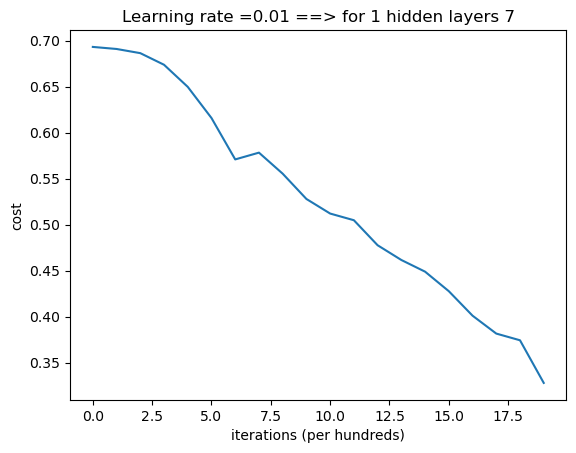

Cost after iteration 2499: 0.10258675542582335
Accuracy: 0.5750000000000001
Accuracy: 0.7749999999999999


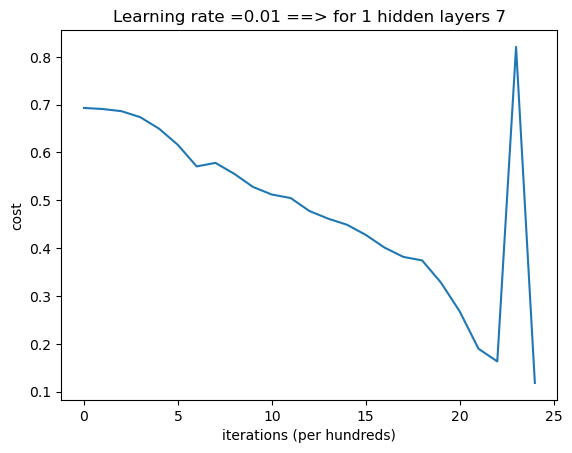

Cost after iteration 2999: 0.05017295291547919
Accuracy: 0.61
Accuracy: 0.7762499999999999


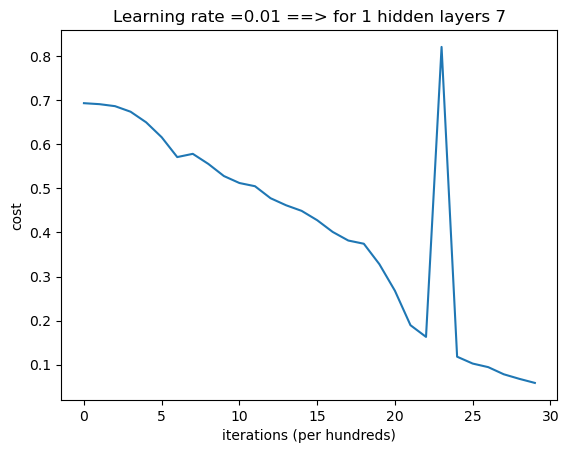

Cost after iteration 1999: 0.5222498445217528
Accuracy: 0.525
Accuracy: 0.6487499999999999


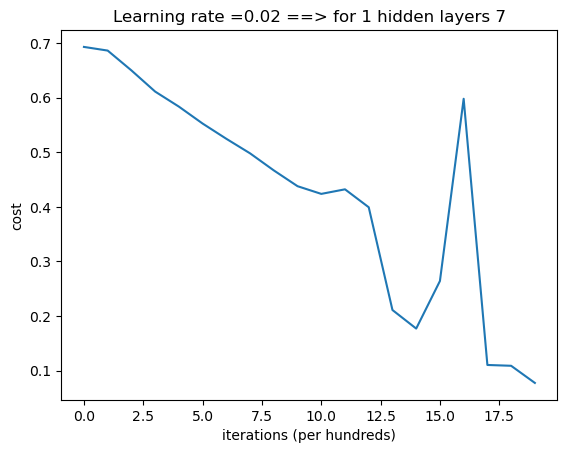

Cost after iteration 2499: 0.021383671274141192
Accuracy: 0.585
Accuracy: 0.7762499999999999


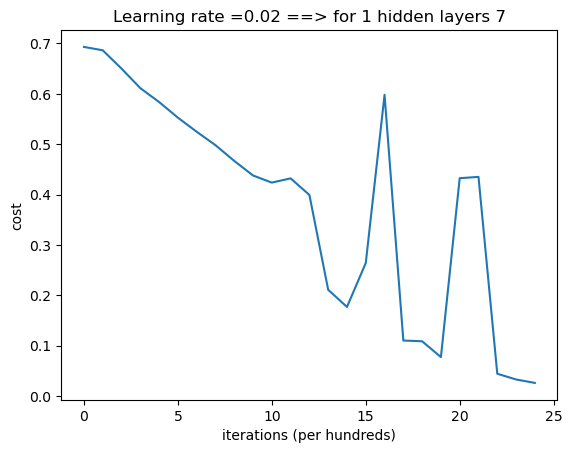

Cost after iteration 2999: 0.010578349275515793
Accuracy: 0.595
Accuracy: 0.7799999999999999


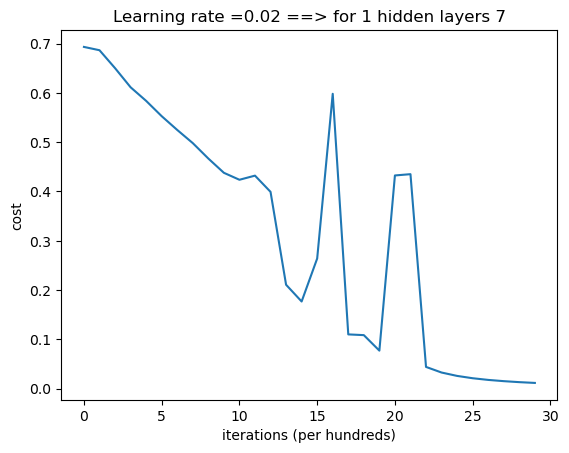

In [202]:

def plot_costs(costs, learning_rate):
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    p1,pred_test = predict(x_test_flatten_1000, y_test_1000, parameters)
    p2,pred_train=predict(x_train_flatten_1000, y_train_1000, parameters)
    plt.title("Learning rate =" + str(learning_rate)+" ==> for 1 hidden layers 7")
    #plt.title("test accuracy= "+ str(pred_test)+ " train accuracy ="+ str(pred_train))
    plt.show()
result={}
k=0
for alpha in [0.01,0.02]:
    for i in [2000,2500,3000]:
        k+=1
        parameters, costs = L_layer_model(x_train_flatten_500, y_train_500, layers_dims,learning_rate=alpha, num_iterations = i, print_cost = False)
        #print(k,parameters)
        result[k]={
            "alpha":alpha,
            "iterations":i,
            "parameters":parameters,
            "costs":costs
        }
        plot_costs(costs,alpha)

In [199]:
result

{1: {'alpha': 0.01,
  'iterations': 100,
  'parameters': {'W1': array([[-0.01249373,  0.01547907, -0.00952237, ..., -0.01369686,
           -0.0003218 , -0.01043666],
          [ 0.01607592,  0.00808116,  0.00291726, ..., -0.00117752,
           -0.01611224, -0.00033561],
          [ 0.0019732 , -0.00196001,  0.00590741, ...,  0.00623035,
           -0.00362177,  0.01120906],
          ...,
          [ 0.00420399, -0.00820968,  0.00582581, ...,  0.00871323,
            0.00187666, -0.00420681],
          [ 0.00444292,  0.02378238, -0.00342937, ..., -0.00406171,
           -0.0084691 ,  0.0126821 ],
          [-0.00031737,  0.01110688,  0.00573561, ..., -0.00941987,
            0.0354346 , -0.00743958]]),
   'b1': array([[ 3.22757165e-04],
          [ 1.82336227e-04],
          [ 5.00692510e-05],
          [-1.79919411e-05],
          [-6.17706186e-06],
          [-1.19248022e-05],
          [ 1.16782502e-05]]),
   'W2': array([[ 0.03576809, -0.02604067,  0.00630265, -0.00282225, -0.005